In [9]:
!pip install --upgrade seaborn
!pip install --upgrade matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
# Install required libraries
!pip install instaloader requests matplotlib seaborn pandas

# Import libraries
import instaloader
import requests
import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Session established with cookies.

Profile Details:
Username: shrads
Fullname: Shraddha Singh
Followers: 1978737
Following: 822
Posts: 3028
Biography: Engineer & Certified SKINcare Consultant
✩ Life & Style with sidekicks @kikiandaani 
✩ YouTube 2.7M+ | Tiktok 700K+ 
✩ contact@shrads.com
Is_private: False

Engagement Rate: 3.93%


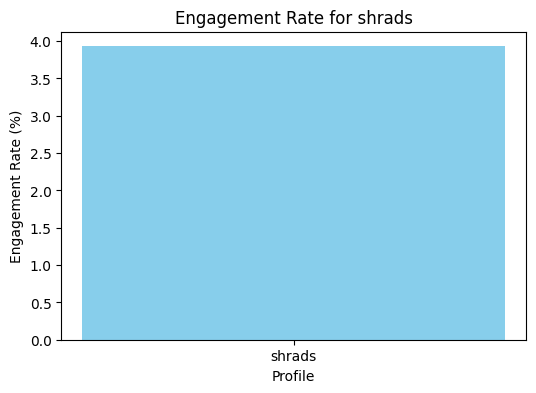

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [11]:


# Initialize Instaloader
L = instaloader.Instaloader()

# Set up session using cookies
def setup_session_with_cookies(sessionid, csrftoken, ds_user_id):
    session = requests.Session()
    session.cookies.set("sessionid", sessionid)
    session.cookies.set("csrftoken", csrftoken)
    session.cookies.set("ds_user_id", ds_user_id)
    L.context._session = session
    print("Session established with cookies.")

# Extract Profile Data with Engagement Metrics
def extract_profile_data(username, num_posts=10):
    try:
        profile = instaloader.Profile.from_username(L.context, username)
        profile_data = {
            'username': profile.username,
            'fullname': profile.full_name,
            'followers': profile.followers,
            'following': profile.followees,
            'posts': profile.mediacount,
            'biography': profile.biography,
            'is_private': profile.is_private,
        }

        # Collect post data
        posts = []
        for i, post in enumerate(profile.get_posts()):
            if i == num_posts:
                break
            posts.append({
                'date': post.date_utc,
                'likes': post.likes,
                'comments': post.comments,
                'engagement': post.likes + post.comments,
                'caption': post.caption[:30] if post.caption else ''
            })
        
        # Create DataFrame from posts
        posts_df = pd.DataFrame(posts)
        return profile_data, posts_df
    except Exception as e:
        print(f"Error fetching profile: {e}")
        return None, None

# Display Profile Details
def display_profile_details(profile_data):
    print("\nProfile Details:")
    for key, value in profile_data.items():
        print(f"{key.capitalize()}: {value}")

# Calculate Engagement Rate
def calculate_engagement_rate(posts_df, followers):
    if not posts_df.empty:
        total_engagement = posts_df['engagement'].sum()
        engagement_rate = (total_engagement / (len(posts_df) * followers)) * 100
        return engagement_rate
    return 0

# Visualize Engagement Rate
def visualize_engagement_rate(engagement_rate, username):
    plt.figure(figsize=(6, 4))
    plt.bar([username], [engagement_rate], color='skyblue')
    plt.xlabel('Profile')
    plt.ylabel('Engagement Rate (%)')
    plt.title(f'Engagement Rate for {username}')
    plt.show()

# Visualize Engagement Data from DataFrame
def visualize_engagement_data(posts_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=posts_df, x='date', y='engagement', color='coral')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Engagement (Likes + Comments)')
    plt.title('Engagement on Recent Posts')
    plt.show()

# Main Function
def main():
    # Enter your cookies once
    sessionid = input("Enter your Instagram sessionid cookie: ")
    csrftoken = input("Enter your Instagram csrftoken cookie: ")
    ds_user_id = input("Enter your Instagram ds_user_id cookie: ")

    # Set up session with cookies
    setup_session_with_cookies(sessionid, csrftoken, ds_user_id)

    # Get the target username to analyze
    target_username = input("Enter the Instagram username to analyze: ")

    # Extract profile data and posts data
    profile_data, posts_df = extract_profile_data(target_username)

    if profile_data and not posts_df.empty:
        # Display profile details
        display_profile_details(profile_data)

        # Calculate engagement rate
        engagement_rate = calculate_engagement_rate(posts_df, profile_data['followers'])
        print(f"\nEngagement Rate: {engagement_rate:.2f}%")

        # Visualize engagement rate
        visualize_engagement_rate(engagement_rate, target_username)

        # Visualize engagement data from DataFrame
        visualize_engagement_data(posts_df)

# Run the main function
main()
